Topic : Lung Cancer Prediction

Group No : 64 

EG/2020/4342 - Sulaiman M.N

EG/2020/4353 - Ahamed M.R.R


Import Libraries

In [272]:
import numpy as np
# Importing the NumPy library and aliasing it as 'np'

import seaborn as sns
# Importing the Seaborn library for data visualization

import pandas as pd
# Importing the Pandas library for data manipulation and analysis

import sklearn.datasets 
# Importing the datasets module from scikit-learn

from sklearn.model_selection import train_test_split  
#this function will split the data into training data and testing data

from sklearn.linear_model import LogisticRegression
#importing the logistic regression model

from sklearn.metrics import accuracy_score
# Importing the accuracy_score function from scikit-learn

import matplotlib.pyplot as plt
# Importing the Matplotlib library for data visualization

Load the Data

In [273]:
df=pd.read_csv('cancer patient data sets.csv')
# Reading the CSV file into a Pandas DataFrame

Analyze the Data and Preprocessing

In [274]:
df.head()
# Displaying the first five rows of the DataFrame 'df'

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [275]:
df.info()
# Displaying information about the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [276]:
df.drop(["index", "Patient Id"], axis = 1, inplace = True)
# Dropping 'index' column and 'Patient Id' Column from the DataFrame 'df'

In [277]:
df.isnull().sum()
# Counting the number of missing values in each column of the DataFrame 'df'

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [278]:
df.describe()
# Generating descriptive statistics for the DataFrame 'df'

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


C:\Users\Dell 7480 7490 MIX\AppData\Local\Temp\ipykernel_2024\4288692352.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age, shade = True, color = "r")


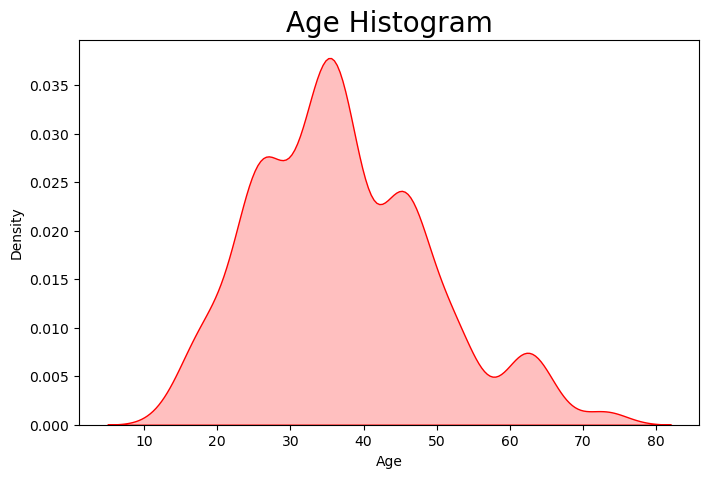

Histogram's skewness is 0.5510959291276972 and kurtosis is 0.059540224308944456


In [279]:
plt.figure(figsize = (8,5)) 
# Setting the figure size for the plot

sns.kdeplot(df.Age, shade = True, color = "r")
#Set the color of the graph to red

plt.title("Age Histogram", fontsize = 20)
# Setting the title for the plot

plt.show()
# Displaying the plot

print("Histogram's skewness is {} and kurtosis is {}".format(df.Age.skew(), df.Age.kurtosis()))
# Printing the skewness and kurtosis of the "Age" distribution

Age column shoud be scalled

We will scale the data later

In [280]:
#retrieving an array containing all the unique values present in the "Level" column of the DataFrame
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [281]:
df["Level"].value_counts()
#counts the occurrences of each unique value in the "Level" column

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='count'>

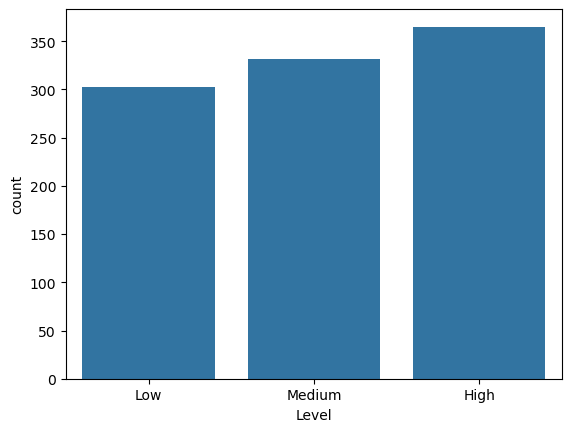

In [282]:
sns.countplot(x="Level", data=df)
# Creating a countplot for the "Level" column with data from the DataFrame 'df'


In [283]:
# Replacing categorical labels in the "Level" column with numerical values

df.Level = df.Level.replace("Low", 0)
# Low is replaced by 0

df.Level = df.Level.replace("Medium", 1)
# Medium is replaced by 1


df.Level = df.Level.replace("High", 2)
# High is replaced by 2



In [284]:
df.dtypes
# returns the data types of each column 

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

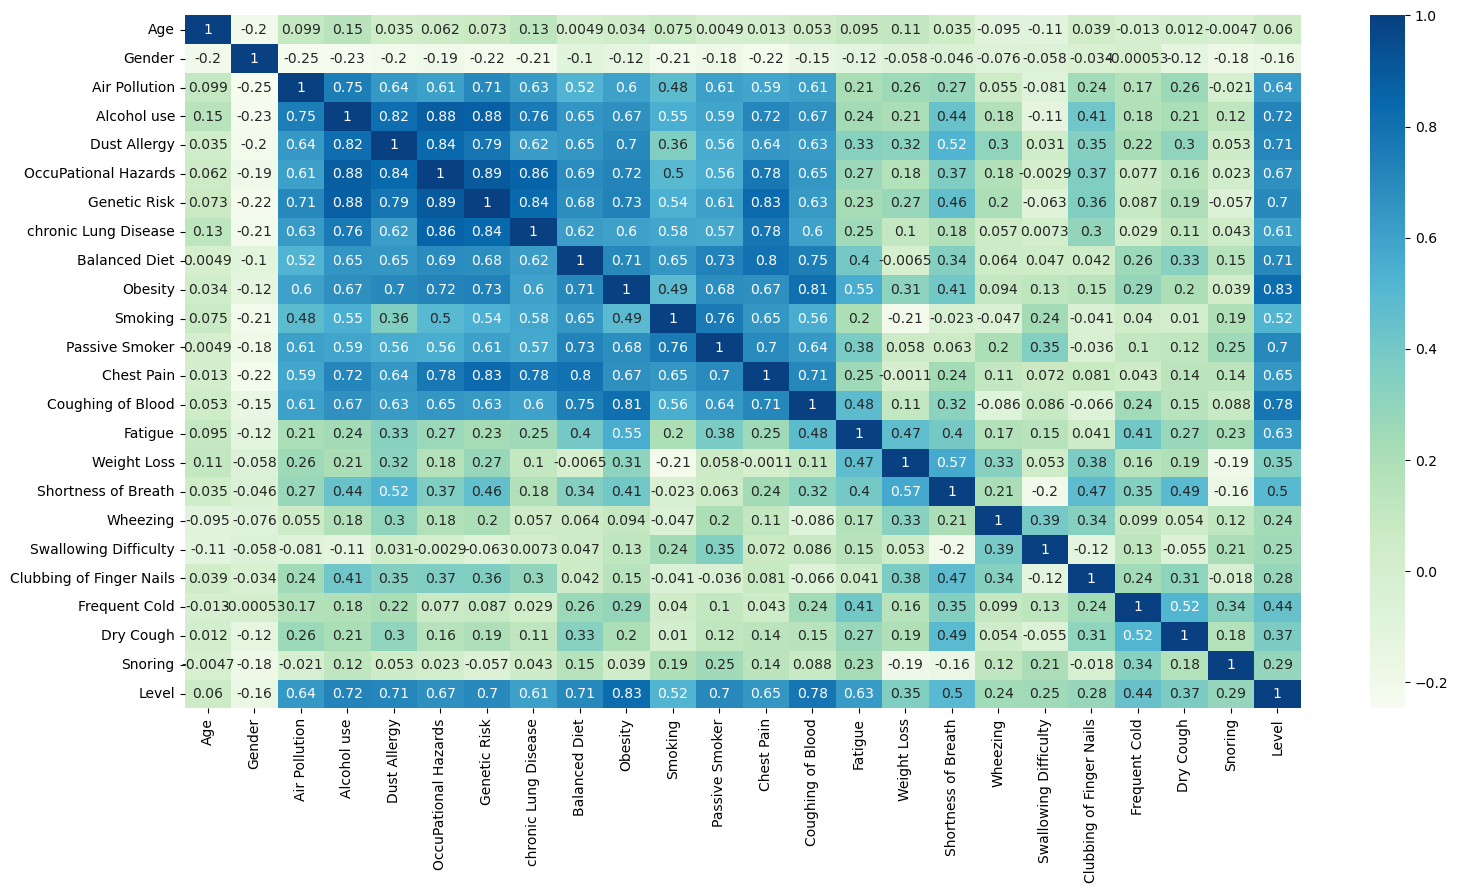

In [285]:
# Setting the figure size for the heatmap
plt.figure(figsize = (18,9))

# Creating a heatmap of the correlation matrix for the DataFrame 'df'
sns.heatmap(df.corr(), cmap='GnBu', annot=True)

# Displaying the heatmap
plt.show()

<Axes: >

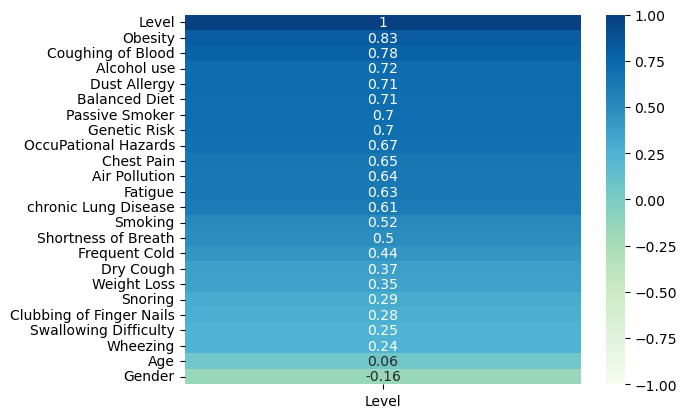

In [286]:
# Creating a heatmap for the correlation of the "Level" column with other columns
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [287]:
#Display all the Columns before drop columns
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [288]:
# Drop the columns which 
df=df.drop(['Gender','Age','Wheezing','Swallowing Difficulty', 'Clubbing of Finger Nails','Snoring','Weight Loss','Dry Cough','Frequent Cold','Shortness of Breath','Smoking','Fatigue'],axis=1)


In [289]:
#Display all the Columns after drop columns
df.columns

Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Level'],
      dtype='object')

In [290]:
# Creating the feature matrix X by excluding the "Level" column
X = df.drop("Level", axis = 1)

# Creating the target variable y with the "Level" column
y = (df["Level"])

In [291]:
# Importing the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Standardizing the feature matrix X using the fit_transform method
X = scaler.fit_transform(X)

Using Logistic Regression

In [292]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=1)

In [293]:
# Creating an instance of the LogisticRegression classifier with the 'liblinear' solver
Classifier = LogisticRegression(solver='liblinear')

# Training the classifier on the training data
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [294]:
#predict the target variable using logistic Regression
y_test_predicted_logis = Classifier.predict(X_test)

In [295]:
from sklearn.metrics import (
    precision_score,        # Importing precision_score for calculating precision
    recall_score,           # Importing recall_score for calculating recall
    accuracy_score,         # Importing accuracy_score for calculating accuracy
    f1_score,               # Importing f1_score for calculating F1 score
    confusion_matrix,       # Importing confusion_matrix for generating confusion matrix
    ConfusionMatrixDisplay, # Importing ConfusionMatrixDisplay for displaying confusion matrix
    classification_report   # Importing classification_report for detailed classification metrics
)


In [296]:
# Define a function 'perform' To calculate and display the outputs
def perform(y_test_predicted):
    print("Precision: ", precision_score(y_test, y_test_predicted, average = 'micro'))
    print("Recall   : ", recall_score(y_test, y_test_predicted, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_predicted))
    print("F1 Score : ", f1_score(y_test, y_test_predicted, average = 'micro'))
    
    
    cm = confusion_matrix(y_test, y_test_predicted)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_predicted))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision:  0.8033333333333333
Recall   :  0.8033333333333333
Accuracy :  0.8033333333333333
F1 Score :  0.8033333333333333

 [[ 69  16   6]
 [ 33  63   4]
 [  0   0 109]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        91
           1       0.80      0.63      0.70       100
           2       0.92      1.00      0.96       109

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.79       300
weighted avg       0.80      0.80      0.80       300

******************************************************



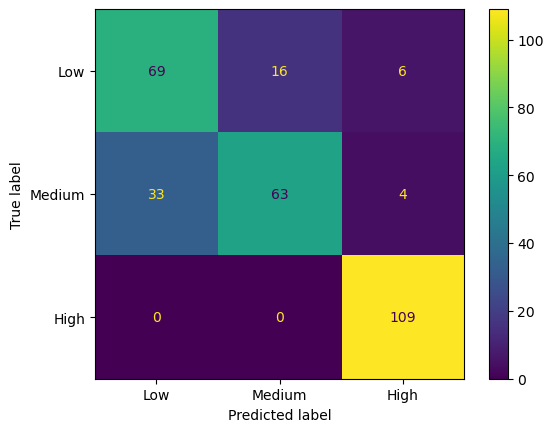

In [297]:
#calling perform function to analyze the output using Logistic Regression
perform(y_test_predicted_logis)

Using k-Nearest Neighbor

In [298]:
# Importing the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [299]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [300]:
# scaler2 = StandardScaler()
# X2_train_scaled = scaler2.fit_transform(X2_train)
# X2_test_scaled = scaler2.transform(X2_test)

In [301]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [302]:
# Train the model
# knn_classifier.fit(X2_train_scaled, y2_train)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [303]:
# Make predictions on the test set
y_test_predicted_knn = knn_classifier.predict(X2_test_scaled)

In [304]:
# Evaluate the model
accuracy2 = accuracy_score(y_test, y_test_predicted_knn)
conf_matrix2 = confusion_matrix(y_test, y_test_predicted_knn)
classification_rep2 = classification_report(y_test, y_test_predicted_knn)

Precision:  1.0
Recall   :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



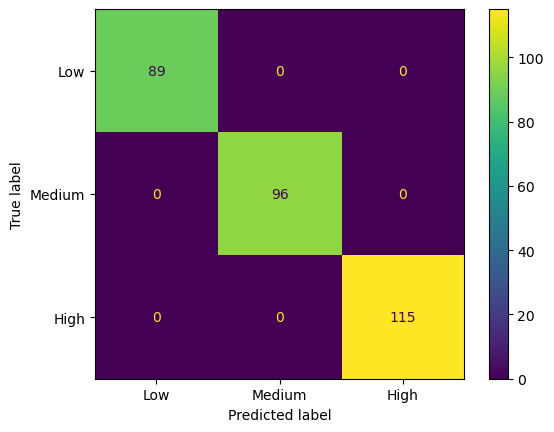

In [305]:
perform(y_test_predicted_knn)

In [306]:
# # Print the results
# print("Accuracy:", accuracy2)
# print("\nConfusion Matrix:\n", conf_matrix2)
# print("\nClassification Report:\n", classification_rep2)